# Proyek Akhir : Image Classification Model Deployment.
---
Daniel Shandy Adryan

1494037162101-932

# Preparation

In [1]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing API's and Library

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet152V2,ResNet50, Xception, InceptionV3
import splitfolders
import os, warnings
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Defining Variables to simplify the source code

In [3]:
mp=MaxPooling2D
konv=Conv2D
bn=BatchNormalization
imgdg = ImageDataGenerator

#classes used for callbacks
class scall(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if ((logs.get('val_accuracy') > 0.85) & (logs.get('accuracy')> 0.85)):
      print ('Pelatihan Dihentikan Karena Akurasi Sudah Mencapai Nilai yang Diinginkan')
      self.model.stop_training = True

Cloneing the datasets from github

In [4]:
! git clone https://github.com/Hrushikesh-github/animal-3 

fatal: destination path 'animal-3' already exists and is not an empty directory.


Printing total images in the folders

In [5]:
print('Total Images : {}'.format(
    len(os.listdir('/content/animal-3/panda')) + 
    len(os.listdir('/content/animal-3/dogs')) + 
    len(os.listdir('/content/animal-3/cats'))
    )
)

Total Images : 3000


Splitting folders into training folders and validation folders

In [6]:
splitfolders.ratio('/content/animal-3', '/content/animal-3/data', seed=1, ratio=(0.8, 0.2))
bdir = '/content/animal-3'
train_dir = os.path.join(bdir, 'train') ## Train Dataset
val_dir = os.path.join(bdir, 'val') ## Validation Dataset

Copying files: 3005 files [00:01, 2637.41 files/s]


In [7]:
os.listdir('/content/animal-3/data/train')

['data', 'panda', 'cats', 'dogs', '.git']

In [8]:
os.listdir('/content/animal-3/data/val')

['data', 'panda', 'cats', 'dogs', '.git']

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_panda_dir = os.path.join(train_dir, 'panda')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(val_dir, 'cats')
val_panda_dir = os.path.join(val_dir, 'panda')
val_dogs_dir = os.path.join(val_dir, 'dogs')

creating the datasets for training

In [10]:
train_datagen = imgdg(
          rescale=1./255,
          rotation_range=30,
          brightness_range = [0.1,1.0],
          horizontal_flip=True,
          vertical_flip=True,
          shear_range = 0.3,
          zoom_range = 0.3,
          fill_mode = 'nearest')

val_datagen = imgdg(rescale=1./255)

In [11]:
train_gen = train_datagen.flow_from_directory(
        '/content/animal-3/data/train',  # direktori data train
        target_size=(100,150),
        batch_size=120,
        shuffle=True,
        seed=1,
        class_mode='categorical',
        classes=(['panda', 'cats', 'dogs']))

validation_gen = val_datagen.flow_from_directory(
        '/content/animal-3/data/val', # direktori data val
        target_size=(100,150),
        batch_size=60,
        shuffle=False,
        class_mode='categorical',
        classes=(['panda', 'cats', 'dogs']))

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


# Modelling and Training

Modelling

In [ ]:
model = tf.keras.models.Sequential()
model.add(Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(100, 150, 3))))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

compiling the model

In [13]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1.0000e-04),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training the model

In [14]:
history = model.fit(
    train_gen,
    epochs= 20,
    steps_per_epoch=20,
    validation_data= validation_gen,
    validation_steps= 10,
    callbacks=[scall()],
    verbose= 2)

Epoch 1/20
20/20 - 733s - loss: 1.0151 - accuracy: 0.5692 - val_loss: 0.5418 - val_accuracy: 0.8833 - 733s/epoch - 37s/step
Epoch 2/20
20/20 - 715s - loss: 0.5370 - accuracy: 0.7858 - val_loss: 0.3328 - val_accuracy: 0.9200 - 715s/epoch - 36s/step
Epoch 3/20
20/20 - 711s - loss: 0.3726 - accuracy: 0.8446 - val_loss: 0.2978 - val_accuracy: 0.9300 - 711s/epoch - 36s/step
Epoch 4/20
Pelatihan Dihentikan Karena Akurasi Sudah Mencapai Nilai yang Diinginkan
20/20 - 712s - loss: 0.2784 - accuracy: 0.8825 - val_loss: 0.2076 - val_accuracy: 0.9450 - 712s/epoch - 36s/step


# Plotting and Predicting

Plot loss

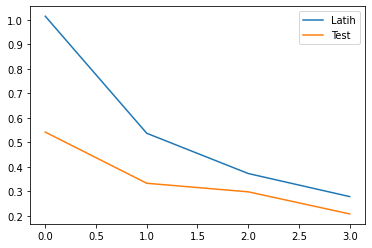

In [15]:
plt.plot(history.history['loss'], label = 'Latih')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend()

Plot Accuracy

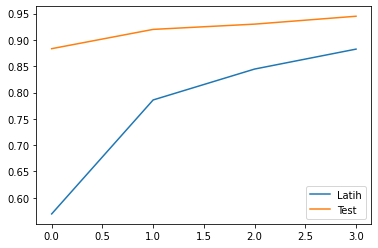

In [16]:
plt.plot(history.history['accuracy'], label = 'Latih')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.legend()

Predicting

Saving dog.jpg to dog (1).jpg
1/1 [==============================] - 1s 940ms/step
[[0.0000000e+00 1.1572823e-26 1.0000000e+00]]
dogs


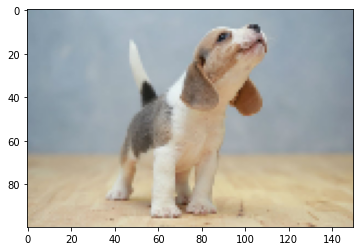

In [17]:
%matplotlib inline
 
upld = files.upload()
 
for fn in upld.keys():
 
  # predicting images
  dir = fn
  gbr = image.load_img(dir, target_size=(100,150))
 
  show = plt.imshow(gbr)
  x = image.img_to_array(gbr)
  x = np.expand_dims(x, axis=0)
  imgs = np.vstack([x])
 
  classes = model.predict(imgs, batch_size=120)  
  print(classes)
  if classes[0][0]==1:
    print('panda')
  elif classes[0][1]==1:
    print('cats')
  elif classes[0][2]==1:
    print('dogs')
  else:
    print('unknown creatures')

# Saving into TF-Lite

In [18]:
# Ignore Warning
warnings.filterwarnings('ignore')

# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('CDP_model.tflite', 'wb') as f:
  f.write(tflite_model)